<font face="微软雅黑" size=3  >
Are there missing values? (10 %)               
    Yes, there are some missing values in runtime, budget and revenue column.<br>
Are there inappropraite values? (10 %)           
    Yes, there are some NAN in runtime, budget and revenue column.<br>
Remove or impute any bad data. (10 %)           
    Use fill method to duplicate the value from last row.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
from scipy import stats
import seaborn as sns


In [2]:
pwd

'/Users/viva/Desktop/7390/Assignment2_7390'

In [3]:
df=pd.read_csv('data.csv')
X = df.iloc[:, :-1].values
df=pd.read_csv('data.csv')
df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009/12/10,2.787965e+09,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007/5/19,9.610000e+08,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015/10/26,8.806746e+08,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012/7/16,1.084939e+09,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012/3/7,2.841391e+08,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
5,258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",http://www.sonypictures.com/movies/spider-man3/,559,"[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007/5/1,8.908716e+08,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The battle within.,Spider-Man 3,5.9,3576
6,260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://disney.go.com/disneypictures/tangled/,38757,"[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010/11/24,5.917949e+08,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,They're taking adventure to new lengths.,Tangled,7.4,3330
7,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://marvel.com/movies/mov

In [6]:
# get the number of missing data points per column
missing_values_count = df.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:10]

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
dtype: int64

In [7]:
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
(total_missing/total_cells) * 100

3.8600874453466583

In [6]:
df1=df.dropna()
df1

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009/12/10,2.787965e+09,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007/5/19,9.610000e+08,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015/10/26,8.806746e+08,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012/7/16,1.084939e+09,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012/3/7,2.841391e+08,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
5,258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",http://www.sonypictures.com/movies/spider-man3/,559,"[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007/5/1,8.908716e+08,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The battle within.,Spider-Man 3,5.9,3576
6,260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://disney.go.com/disneypictures/tangled/,38757,"[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010/11/24,5.917949e+08,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,They're taking adventure to new lengths.,Tangled,7.4,3330
7,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://marvel.com/movies/mov

In [7]:
fill_DF=df.fillna(method='ffill')
fill_DF

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009/12/10,2.787965e+09,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007/5/19,9.610000e+08,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015/10/26,8.806746e+08,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012/7/16,1.084939e+09,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012/3/7,2.841391e+08,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
5,258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",http://www.sonypictures.com/movies/spider-man3/,559,"[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007/5/1,8.908716e+08,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The battle within.,Spider-Man 3,5.9,3576
6,260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://disney.go.com/disneypictures/tangled/,38757,"[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010/11/24,5.917949e+08,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,They're taking adventure to new lengths.,Tangled,7.4,3330
7,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://marvel.com/movies/mov


<font face="微软雅黑" size=3 color=#4C4EA9 >How is the data distributed? (10 %)<br>
    It is normally distributed. <br>
What are the summary statistics? (10 %)<br>
    As shown in the following diagram，the first row "count" means how many values are not NAN. The second row "mean" means the average value of each attribute. The third row "std" means the standard deviation of the sample. The "min" means count the minimum value. The "max" means count the maximum value. <br>
Are there anomalies/outliers? (10 %)<br>
    Yes, in my scatterplot we can see there are some outliers in it, such as budget and vote_average, etc. The anomaliesthe I think is data which beyong the main range in the diagram.

In [8]:
df.head()
#just show first five rows

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009/12/10,2.787965e+09,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007/5/19,9.610000e+08,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015/10/26,8.806746e+08,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012/7/16,1.084939e+09,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012/3/7,2.841391e+08,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [9]:
df.info()
#show the attribute and some info about the attribute, such as how many value in that attribute, and data type and null or not

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null float64
runtime                 4792 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 4201 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-nul

In [10]:
df.shape 
#show the number of rows and columns

(4803, 20)

In [11]:
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4792.000000,4803.000000,4803.000000
mean,4.711723e+07,57165.484281,21.492301,1.085772e+08,106.857888,6.092172,690.217989
std,5.352490e+08,88694.614033,31.816650,7.214462e+08,22.608906,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,2.000000e+07,9014.500000,4.668070,1.267130e+07,94.000000,5.600000,54.000000
50%,2.000000e+07,14629.000000,12.921594,3.042610e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.757200e+07,117.250000,6.800000,737.000000
max,3.645757e+10,459488.000000,875.581305,4.544645e+10,338.000000,10.000000,13752.000000


In [10]:
df['vote_average']
#show the value os this attribute

0       7.2
1       6.9
2       6.3
3       7.6
4       6.1
5       5.9
6       7.4
7       7.3
8       7.4
9       5.7
10      5.4
11      6.1
12      7.0
13      5.9
14      6.5
15      6.3
16      7.4
17      6.4
18      6.2
19      7.1
20      6.5
21      6.2
22      7.6
23      5.8
24      6.6
25      7.5
26      7.1
27      5.5
28      6.5
29      6.9
       ... 
4773    7.4
4774    6.0
4775    6.3
4776    6.8
4777    5.5
4778    6.0
4779    6.4
4780    0.0
4781    6.0
4782    6.8
4783    4.7
4784    6.2
4785    0.0
4786    5.6
4787    4.2
4788    6.2
4789    6.7
4790    6.6
4791    2.0
4792    7.4
4793    6.0
4794    0.0
4795    6.0
4796    6.9
4797    7.5
4798    6.6
4799    5.9
4800    7.0
4801    5.7
4802    6.3
Name: vote_average, Length: 4803, dtype: float64

In [11]:
df['vote_average'].value_counts()
#show how many different values are in a column of the table and calculate how many duplicate values are in that column for each different value

6.5     216
6.0     216
6.7     213
6.3     207
6.1     201
6.4     201
6.2     200
6.6     198
5.9     196
5.8     187
7.0     179
6.8     172
6.9     160
5.7     153
5.5     152
5.6     144
5.4     127
7.3     125
7.1     119
7.2     119
7.4     109
5.3     105
5.2      93
5.0      86
7.5      66
4.9      63
0.0      63
7.6      62
5.1      60
7.7      56
       ... 
8.1      18
8.2      15
3.0      13
4.0      13
3.5      12
3.9      12
3.8      10
3.3       9
3.7       9
8.3       7
3.2       7
2.0       6
2.9       5
10.0      4
3.4       4
3.6       4
3.1       4
2.8       4
1.0       2
8.4       2
2.3       2
8.5       2
0.5       1
9.3       1
2.4       1
2.7       1
2.2       1
9.5       1
2.6       1
1.9       1
Name: vote_average, Length: 71, dtype: int64

In [12]:
df[['popularity','vote_count']].head()
#show the top 5 rows of these two attributes

,popularity,vote_count
0,150.437577,11800
1,139.082615,4500
2,107.376788,4466
3,112.312950,9106
4,43.926995,2124



<font face="微软雅黑" size=4 color=#DA8030 >
Write a summary of what the plot tells you. (10 %)<br>
    <font face="微软雅黑" size=3 color=#4639C7 >
    This dataset is about movie credits data. 
    The quality distribution diagram shows the distribution of vote_average to us. 6.5 is almost the highest one. The lower rates are between 0-3. The lower rates are almost equal to 0. The vate_average between 3 to 5.5, 6 to 6.5, 7 to 7.2 are growing up. The vote_average between 5.5 to 6, 6.5 to 7, 7.2to 10 are falling down. From the scatterpolt diagram aboved we can see most of the comment are around 5 to 8.<br>
    For budget, as we can see in this distplot diagram, the highest budget is around 3. And then it falls down. From scatterpolt diagram, we can see there is a highest point around 0.8. It is maybe an outlier.
    For popularity, in distplot diagram we have the highest value arount the 0.02. And in scatterpolt diagram, there are some outliers around 800.
    For revenue, in scatterpolt diagram, there is an outliers around 4.
    For runtime, in distplot we can see before 100, the values are growing up. And after the 100, the values becoming fall down. At the same time, in scatterpolt diagram, some outliers are around 0.
    For vote_count, we got the highest value in 14000 and then it falls down. 
    In stripplot diagram, we can see the relationship between the popularity and vote_count, the popuarity and budge.
    Also in swarmplot diagram, we can see this relationship. The different bewteen these two is swarmplot displays the scatter plots of different categories in a tree shape， other functions are similiar with stripplot.
    
   


<font face="微软雅黑" size=4 color=#DA8030 >
    Are any of the columns correlated? (10 %)<br>
    <font face="微软雅黑" size=3 color=#4639C7 >
    The popularity should related to vote_count. Because more and more people saw one movie, this movie would got more review and rate. And I think another relationship is that the budget and popularity. Because most movie company don't care what kind of movie they made, they just care about the profit, the popluarity of watching movie is relate to the profit.  

<font face="微软雅黑" size=4 color=#DA8030 >
    Write a clear summary of what the EDA tells you (20 %)<br>
    <font face="微软雅黑" size=3 color=#4639C7 >
    The EDA shows that people would like to give a movie rate from 4.5 to 8. Only a few people will give a 0-4 and 8-10 rate to a movie. Besides that, if more people saw a movie, this movie has more opportunities to be rated. We got highest point around 0.8 for budget. We have the highest value arount the 0.02 for popluarity. We got highest point around 14000 for vote_count. Besides that, there are some arrtibutes that maybe have some outliers. There are runtime, popularity and budget.

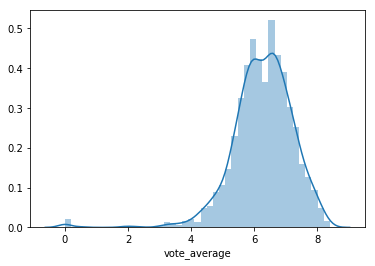

In [13]:
sns.distplot(df1['vote_average'])
#distplot--show the distribution state of product quality characteristics can be seen intuitively. It is clear about the data distribution and easy to judge the overall quality distribution

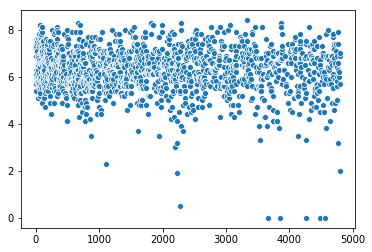

In [27]:
sns.scatterplot(data=df1['vote_average'])

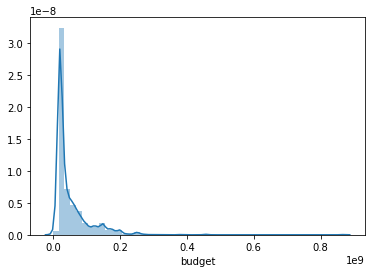

In [14]:
sns.distplot(df1['budget'])

<font face="微软雅黑" size=3 color=#4639C7 >
     As we can see in this distplot, the highest budget is around 3. And then it falls down.

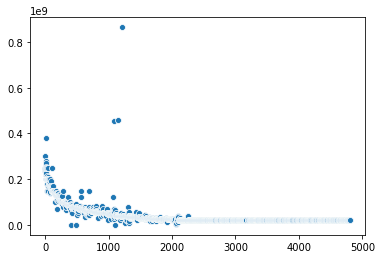

In [17]:
sns.scatterplot(data=df1['budget'])

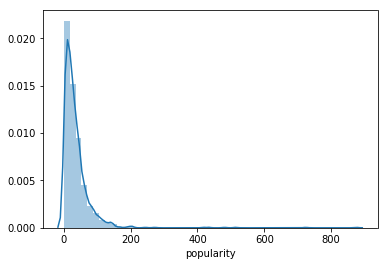

In [18]:
sns.distplot(df1['popularity'])

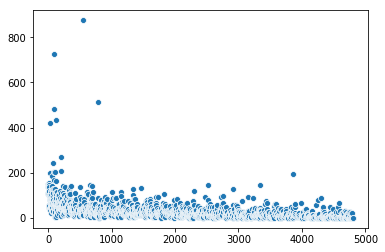

In [24]:
sns.scatterplot(data=df1['popularity'])

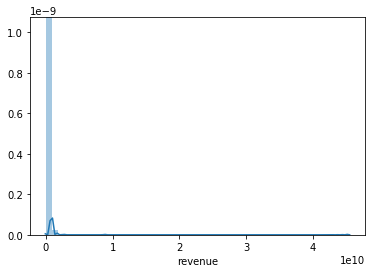

In [19]:
sns.distplot(df1['revenue'])

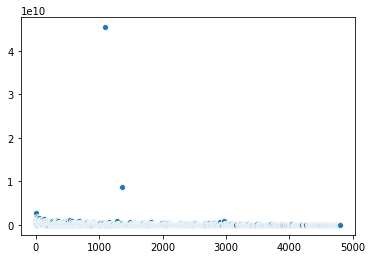

In [25]:
sns.scatterplot(data=df1['revenue'])

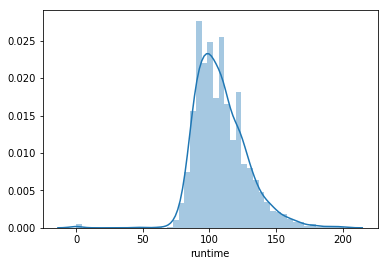

In [20]:
sns.distplot(df1['runtime'])

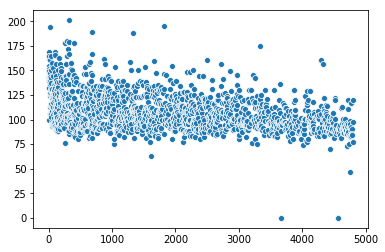

In [26]:
sns.scatterplot(data=df1['runtime'])

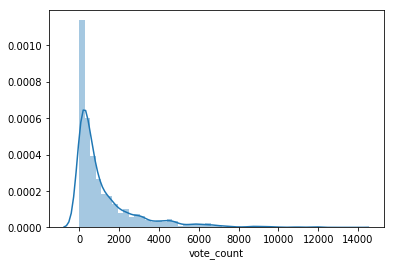

In [21]:
sns.distplot(df1['vote_count'])

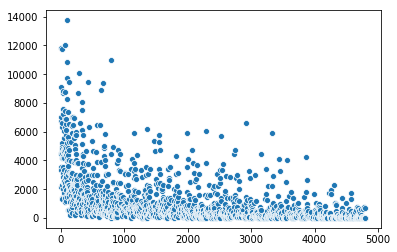

In [30]:
sns.scatterplot(data=df1['vote_count'])

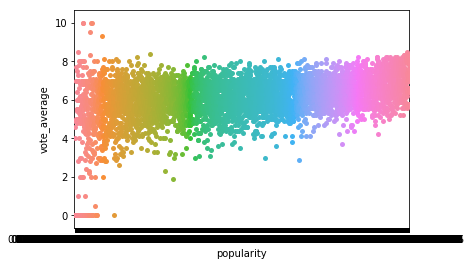

In [22]:
sns.stripplot(x="popularity", y="vote_average", data=df, jitter=True)
#show the value of popularity attribute respectively according to the corresponding category of vote_average attribute, which is suitable for classification data.

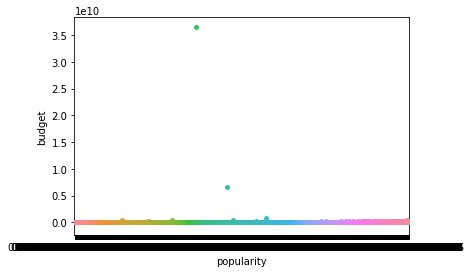

In [31]:
sns.stripplot(x="popularity", y="budget", data=df, jitter=True)

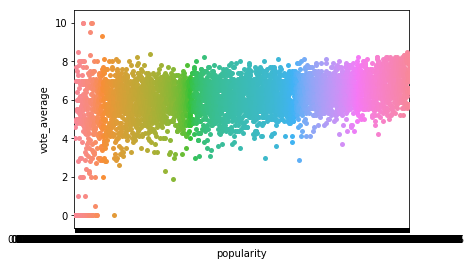

In [23]:
sns.swarmplot(x="popularity", y="vote_average", data=df)


              popularity  vote_average    budget  vote_count
popularity      1.000000      0.273952  0.025221    0.778130
vote_average    0.273952      1.000000  0.001983    0.312997
budget          0.025221      0.001983  1.000000    0.030479
vote_count      0.778130      0.312997  0.030479    1.000000


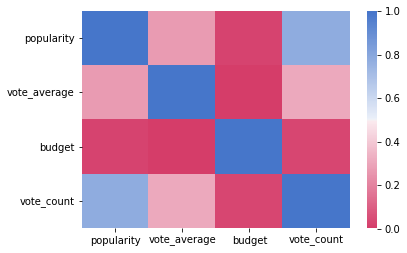

In [13]:
cmap = sns.diverging_palette(0, 255, sep=1, n=256, as_cmap=True)

correlations = df[['popularity', 'vote_average', 'budget', 'vote_count']].corr()
print (correlations)
sns.heatmap(correlations, cmap=cmap)